Wartiant zadania numer 3 (na liście widnieje numer 18, ale watriantów zadania jest w sumie 15, więc wybrano numer 3 licząc znowu od początku)

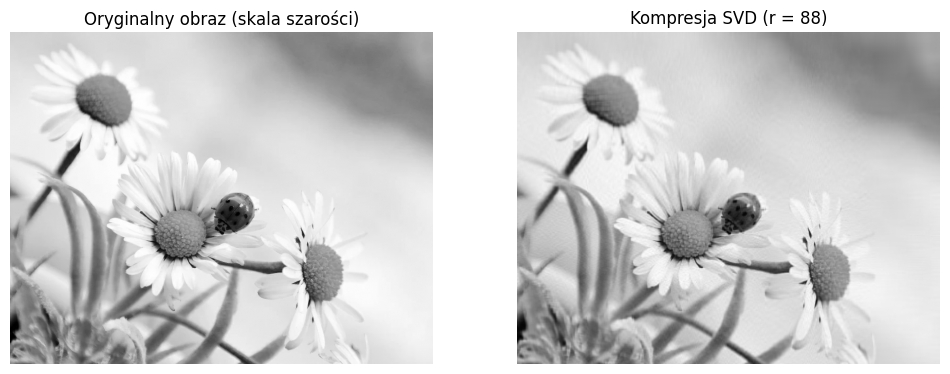

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from numpy.linalg import svd

image_path = '3.webp'
original_image = imread(image_path)

gray_image = np.mean(original_image, axis=-1)

U, S, VT = svd(gray_image, full_matrices=False)

cumulative_singular_values = np.cumsum(S) / np.sum(S)
num_singular_values_90 = np.argmax(cumulative_singular_values >= 0.90) + 1

compressed_image = U[:, :num_singular_values_90] @ np.diag(S[:num_singular_values_90]) @ VT[:num_singular_values_90, :]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Oryginalny obraz (skala szarości)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(compressed_image, cmap='gray')
plt.title(f'Kompresja SVD (r = {num_singular_values_90})')
plt.axis('off')

plt.show()


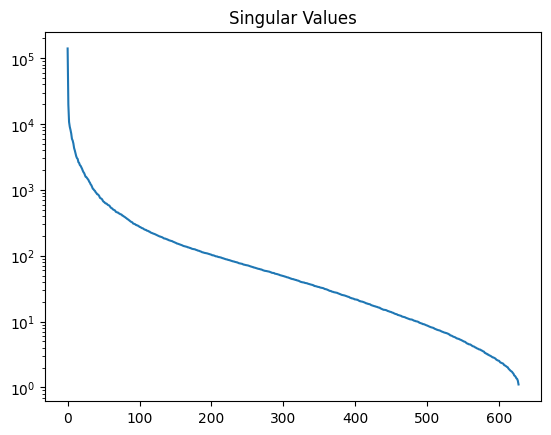

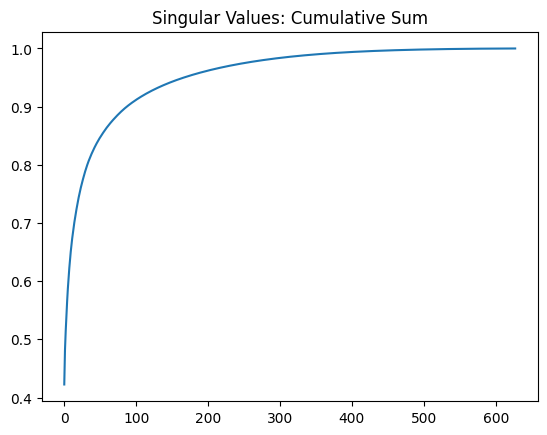

In [3]:
S = np.diag(S)
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()